In [1]:
from ga_regression import *
from matplotlib import pyplot as plt
from functools import partial
import PIL
import matplotlib as mpl
from matplotlib.cm import ScalarMappable
from pvutils import iter_subplots
from pyvista import PolyData
import pyvista as pv
from scipy.stats import pearsonr

C:\Users\dg\.conda\envs\diffnet4\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [7]:
file = Path(r"D:\resynth\run_09_10\run00009_resynth\2025-08-21-11-09-00\opts_and_metadata.pt")
file = Path(r"D:\resynth\run_51_52\run00051_resynth\2025-08-24-14-51-34\opts_and_metadata.pt")
file = Path(r"D:\resynth\run_51_52\run00051_resynth\2025-08-26-09-57-38\opts_and_metadata.pt")
readers = Readers.from_file(file)

In [8]:
readers.hparams.iloc[:, 3:]

,input_features,channel,k_eig,learning_rate,decay_every,decay_rate,n_blocks,dropout,n_faces,spike_window,isolate_channel_idx,weight_error,augment,use_visible,use_color,norm_verts,curr_learning_rate,ultimate_linear
0,xyz,"(0,)",128,0.0001,10,0.5,4,False,500,"(0.07, 0.75)",None,None,None,None,None,None,7.812500e-07,False
1,xyz,"(0,)",128,0.0001,10,0.5,4,False,500,"(0.07, 0.75)",None,None,None,None,None,None,7.812500e-07,True
2,xyz,"(17,)",128,0.0001,10,0.5,4,False,500,"(0.07, 0.75)",None,None,None,None,None,None,7.812500e-07,False
3,xyz,"(17,)",128,0.0001,10,0.5,4,False,500,"(0.07, 0.75)",None,None,None,None,None,None,7.812500e-07,True
4,xyz,"(23,)",128,0.0001,10,0.5,4,False,500,"(0.07, 0.75)",None,None,None,None,None,None,7.812500e-07,False
5,xyz,"(23,)",128,0.0001,10,0.5,4,False,500,"(0.07, 0.75)",None,None,None,None,None,None,7.812500e-07,True
6,xyz,"(14,)",128,0.0001,10,0.5,4,False,500,"(0.07, 0.75)",None,None,None,None,None,None,7.812500e-07,False
7,xyz,"(14,)",128,0.0001,10,0.5,4,False,500,"(0.07, 0.75)",None,None,None,None,None,None,7.812500e-07,True
8,xyz,"(31,)",128,0.0001,10,0.5,4,False,500,"(0.07, 0.75)",None,None,None,None,None,None,7.812500e-07,False
9,xyz,"(31,)",128,0.0001,10,0.5,4,False,500,"(0.07, 0.75)",None,None,None,None,None,None,7.812500e-07,True


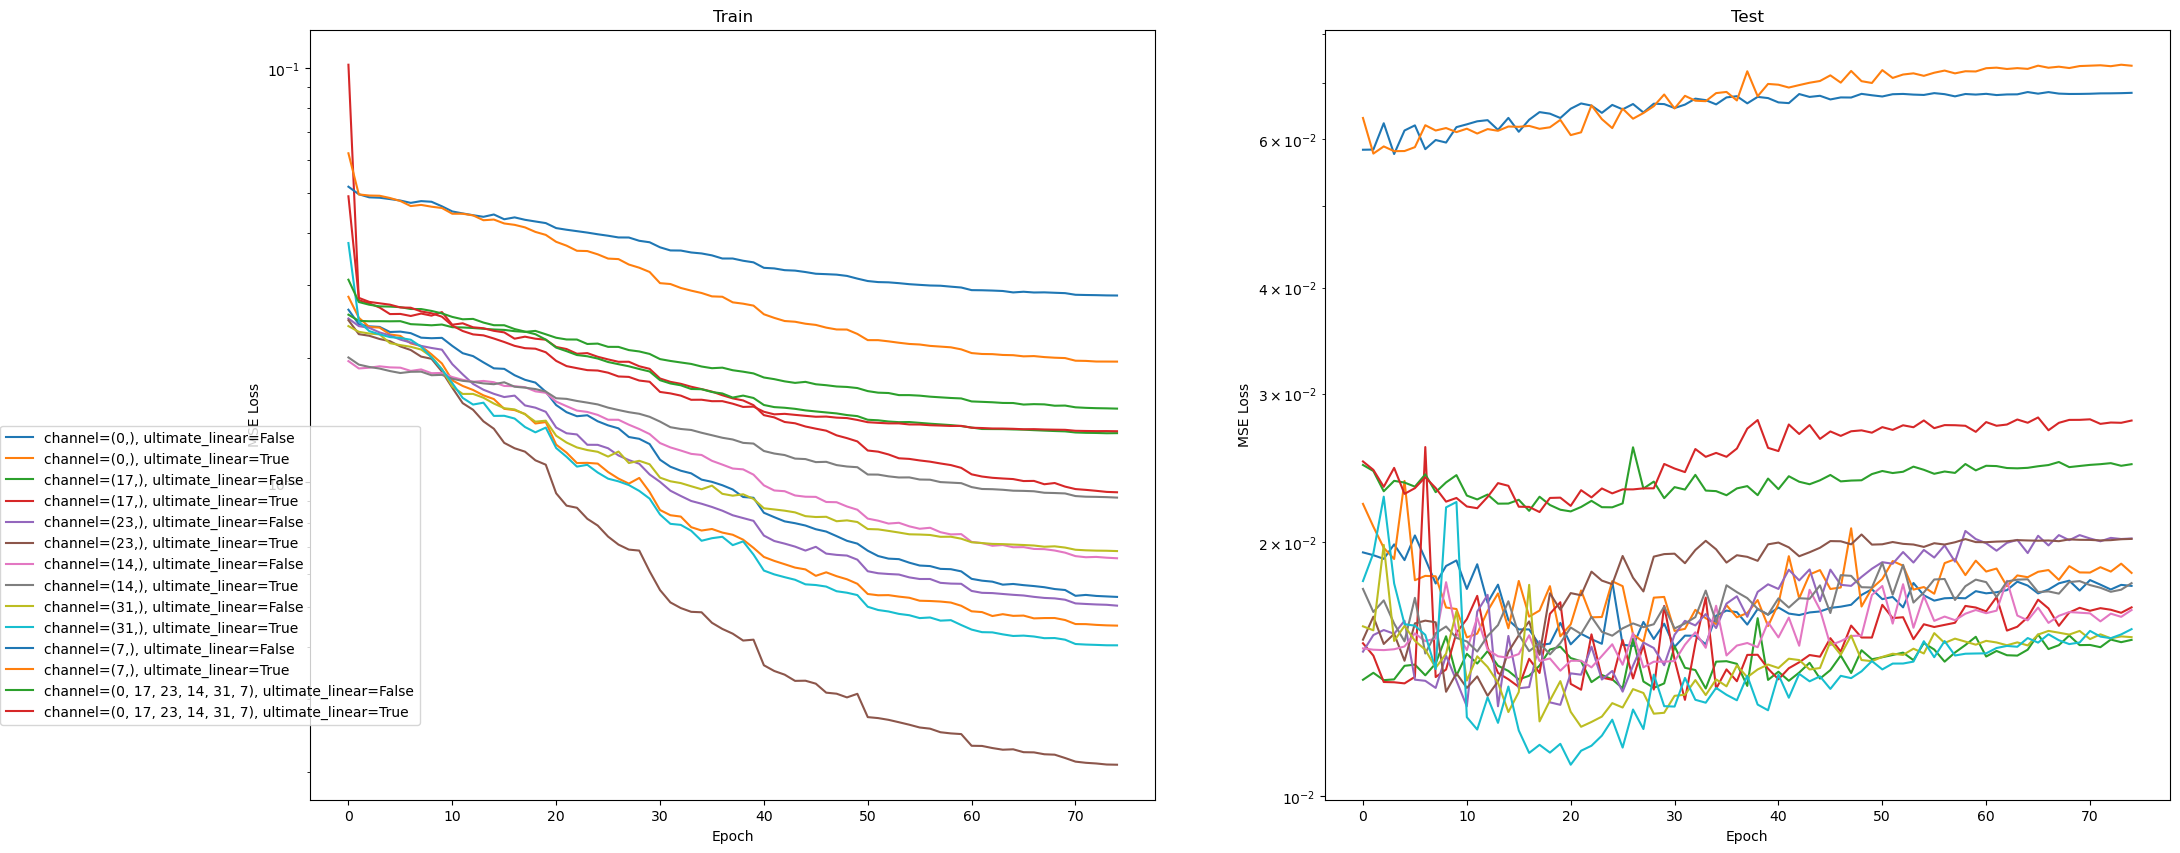

In [9]:
fig, axs = readers.plot_training(tags=None, mode='loss', legend=(0, .15), sharey=False, figsize=(24, 10))

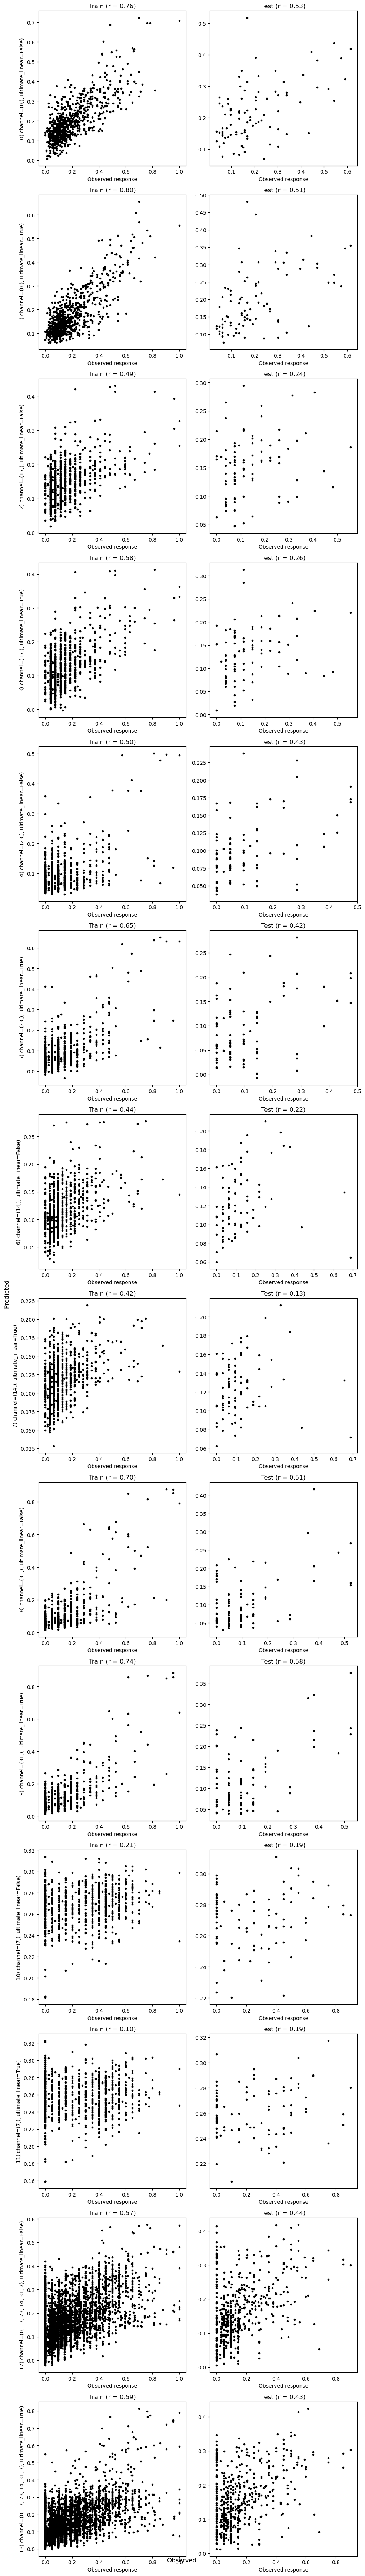

In [11]:
readers.scatter_plots(tags=None)  # TODO ability to load last-trained model

In [ ]:
hparams = readers.hparams.copy()
hparams['n_channels'] = [len(c) for c in hparams.channel]
min_train_loss = np.array([r.scalar('loss/test')[1].min() for r in readers])

Text(0, 0.5, 'Ultimate linear')

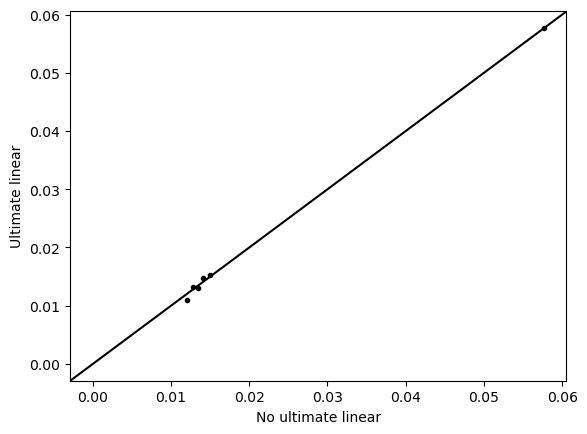

In [34]:
hp_single_ch = hparams.query('n_channels == 1')
has_linear = hp_single_ch.ultimate_linear
hp_single_ch_no_lin = hp_single_ch[~has_linear]
hp_single_ch_lin = hp_single_ch[has_linear]

loss_single_ch_lin = min_train_loss[hp_single_ch_lin.index]
loss_single_ch_no_lin = min_train_loss[hp_single_ch_no_lin.index]

plt.plot(loss_single_ch_no_lin, loss_single_ch_lin, 'k.')
plt.axline((0, 0), slope=1, color='k')
plt.xlabel('No ultimate linear')
plt.ylabel('Ultimate linear')

Text(0, 0.5, 'All channels at once')

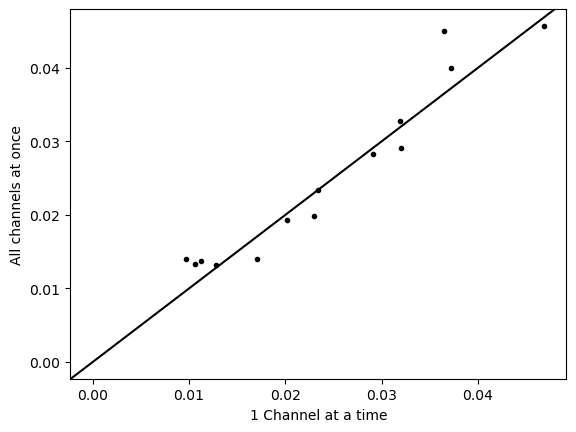

In [6]:
loss_all_channels = readers[-1].scatter_data.by_channel_loss(scene_ids=readers[-1].train_scenes)

loss_single_channels = np.concatenate([r.scatter_data.by_channel_loss(scene_ids=r.train_scenes) for r in readers[:-1]])

plt.plot(loss_single_channels, loss_all_channels, 'k.')
plt.axline((0, 0), slope=1, color='k')
plt.xlabel('1 Channel at a time')
plt.ylabel('All channels at once')